# Demo FaceSwapper

## 1. Import Packages

In [1]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

ModuleNotFoundError: No module named 'numpy'

## 2. Load the model

In [15]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=True, download_zip=True)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

## 3. Load the image

In [16]:
img = ins_get_image('t1')

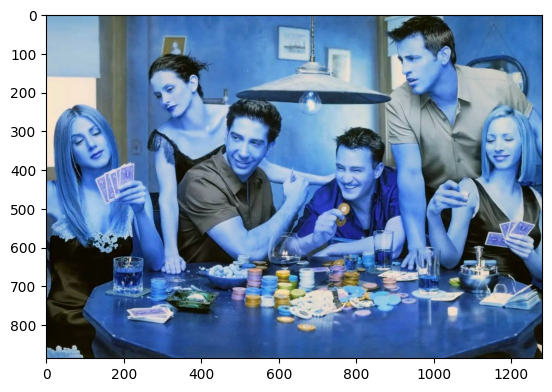

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(img)
plt.show()

## 4. Detect the faces

In [18]:
faces = app.get(img)
faces = sorted(faces, key = lambda x : x.bbox[0])

/home/ctdo/.pyenv/versions/face/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [8]:
type(faces)

list

In [9]:
faces

[{'bbox': array([ 58.7704 , 258.65308, 167.52798, 396.1947 ], dtype=float32),
  'kps': array([[ 87.882385, 329.7735  ],
         [131.18228 , 308.5124  ],
         [122.29021 , 340.73743 ],
         [114.0064  , 369.7087  ],
         [149.48508 , 351.72122 ]], dtype=float32),
  'det_score': 0.8785354,
  'landmark_3d_68': array([[ 5.39518394e+01,  3.46558624e+02,  6.85628128e+01],
         [ 6.32161407e+01,  3.59154205e+02,  6.66789093e+01],
         [ 7.30106964e+01,  3.71654510e+02,  6.34709320e+01],
         [ 8.28882751e+01,  3.82821869e+02,  5.80806046e+01],
         [ 9.41306839e+01,  3.91222931e+02,  4.68147888e+01],
         [ 1.05946075e+02,  3.95431854e+02,  3.70160446e+01],
         [ 1.17602470e+02,  3.97146729e+02,  2.84863262e+01],
         [ 1.30027191e+02,  3.96487854e+02,  1.75390816e+01],
         [ 1.47661118e+02,  3.92973389e+02,  1.25426989e+01],
         [ 1.60142059e+02,  3.82182953e+02,  2.18797836e+01],
         [ 1.66003235e+02,  3.71846832e+02,  3.66312561e+01

In [10]:
len(faces)==6

True

## 5. Define the image of face to change (saveid)

In [11]:
source_face = faces[2]

## 6. Make the faceswap

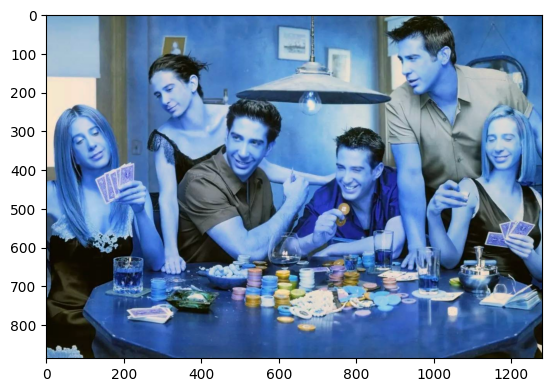

In [24]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)
# cv2.imwrite("./t1_swapped.jpg", res)
imgplot = plt.imshow(res)
plt.show()

In [25]:
res2 = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res2.append(_img)
res2 = np.concatenate(res2, axis=1)
# cv2.imwrite("./t1_swapped2.jpg", res2)
imgplot = plt.imshow(res2)
plt.show()